# Intermediate Python
Using common data science libraries

### Matplotlib and Seaborn
Data visulaization in python that works directly with `pandas`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#this will print plots in the notebook
%matplotlib inline 

In [ ]:
#works with pandas!
df_train = pd.read_csv('data/train.csv')
df_train.Fare.plot.hist()

In [ ]:
df_train.plot.scatter(x = "Age",y = "Fare")

In [ ]:
(df_train[['Pclass','Fare']]
 .boxplot(by = 'Pclass'))

### Low level matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plot_data = np.arange(20)

plt.plot(plot_data) #plot is a line plot

In [ ]:
# the base object for matplotlib is a figure
fig = plt.figure()
fig
# in Jupyter we must keep all commands for a single plot in one cell.

# there is nothing to show becuse we haven't populated anything yet!
# images are built using subplots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.hist(np.random.standard_normal(100))
ax2.plot(np.random.standard_normal(100).cumsum(),
        color = "black",
        linestyle = "dashed")


In [ ]:
#instead of creating each subplot one at a time you can use subplots
fig, axes = plt.subplots(nrows= 2, ncols=2, sharex = True, sharey = True)

# then access each sub plot as an index
axes[0,0].hist(np.random.standard_normal(100))
axes[1,1].hist(np.random.standard_normal(100))

fig.subplots_adjust(wspace= 0, hspace=0)

### Color, Linestyle, and Marker
There are dozens of color names, linestyles, and markers. Here are a few.

In [ ]:
fig = plt.figure()
axes = fig.add_subplot()

axes.plot(np.random.standard_normal(50).cumsum(),
           color = "#de2d26", #color can also be hex code
           linestyle = "dashed",
           marker = "o",
           label = "smooth line")
axes.plot(np.random.standard_normal(50).cumsum(),
           color = "black", #color can also be hex code
           linestyle = "dashed",
           drawstyle = "steps-post",
           label = "step line")
axes.legend()


In [ ]:
from numpy.random import normal as n

fig = plt.figure()
axes = fig.add_subplot()

axes.plot(n(1,5,20).cumsum())

axes.set_xticks([0, 5, 10, 15, 20])

axes.set_xticklabels(["zero", "five", "ten", "fifteen", "twenty"],                           
                   rotation=30, fontsize=8)

axes.set_title("my random numbers")

axes.set_xlabel("total random numbers")

axes.set_ylabel("total running total")

### Saving Plots

In [ ]:
fig = plt.figure()
axes = fig.add_subplot()

axes.plot(n(1,5,20).cumsum())

axes.set_xticks([0, 5, 10, 15, 20])

axes.set_xticklabels(["zero", "five", "ten", "fifteen", "twenty"],                           
                   rotation=30, fontsize=8)

axes.set_title("my random numbers")

axes.set_xlabel("total random numbers")

axes.set_ylabel("total running total")

fig.savefig("my_plot.svg", bbox_inches="tight")

### Plotting with Seaborn

In [136]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Density'>

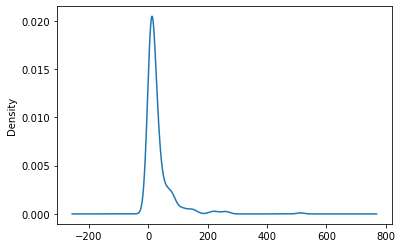

In [138]:
import seaborn as sns #convention but it is already integrated into pandas

# remember this example from before? this is already using seaborn
df_train.Fare.plot.density()

In [139]:
# unlike R we still need to do a lot of pre-proessing
df_counts = (df_train[['Sex','Survived']]
             .value_counts()
             .reset_index()
             .rename(columns = {0:"Count"})
             .sort_values(["Sex","Survived"])
             .set_index(pd.Index(['Female Did Not Survive', 'Female Survived','Male Did Not Survive','Male Suvived']))
            )
             
df_counts

,Sex,Survived,Count
Female Did Not Survive,female,0,81
Female Survived,female,1,233
Male Did Not Survive,male,0,468
Male Suvived,male,1,109


<AxesSubplot:>

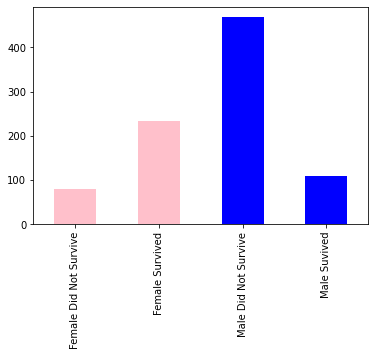

In [140]:
my_colors = ['pink','pink','blue','blue']
df_counts.Count.plot.bar(stacked = True, color = my_colors)

The following methods for `.plot` directly on pandas dataframes are also available

* bar
* hist
* box
* density
* area
* scatter
* hexbin
* pie

<AxesSubplot:title={'center':'Fare'}, xlabel='[Pclass]'>

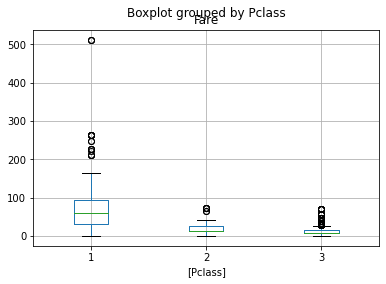

In [141]:
# you can even use some methods directly 
(df_train[['Pclass','Fare']]
 .boxplot(by = 'Pclass'))